In [35]:
import ipyvolume.pylab as p3
import ipyvolume
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()
from ipywidgets import interact, interactive
from IPython.display import display
import ipywidgets as widgets
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as mpb
import SimpleITK as sitk
import os
import utils.general as ge
import utils.histogram as hist
import utils.plotImage2Image_2dHist as p2i
%matplotlib inline

Loading BokehJS ...

In [22]:
def showSlice(img):
    zSlice = img[1, :, :]
    pl = figure(
        plot_width=400, 
        plot_height=400, 
        x_range=(0, 10), 
        y_range=(0, 10))
    slicer = pl.image(
        image = [zSlice], 
        x=[0], 
        y=[0], 
        dw=[10], 
        dh=[10])
    
    def update(z):
        zSlicer = img[z, :, :]
        slicer.data_source.data['image'] = [zSlicer]
        push_notebook()
        
    show(pl, notebook_handle = True)
    play = widgets.Play(
        value=50,
        min=0,
        max=154,
        step=1,
        description="Press play",
        disabled=False)
    slider = widgets.IntSlider(min=0,
                               max=154,
                               step=1)
    widgets.jslink((play, 'value'), (slider, 'value'))
    interact(update, z = play)
    display(slider)

In [2]:
import SimpleITK as sitk

In [134]:
image = sitk.ReadImage('/home/mountain/Desktop/BrainNets/data/Brats17_2013_2_1/Brats17_2013_2_1_t1ce.nii.gz')

In [135]:
image = sitk.Cast(image, sitk.sitkFloat32 )

In [136]:
imageArray = sitk.GetArrayFromImage(image)

maskImageArray = imageArray != 0
maskImageArray = maskImageArray.astype('int32')
maskImage = sitk.GetImageFromArray(maskImageArray)
maskImage.CopyInformation(image)

In [137]:
imageN4 = sitk.N4BiasFieldCorrection(image, maskImage)

In [126]:
arrayN4 = sitk.GetArrayFromImage(imageN4)

In [127]:
arrayN4.shape

(77, 120, 120)

In [128]:
array.shape

(77, 120, 120)

In [129]:
array = sitk.GetArrayFromImage(image)

In [130]:
x_data = array.reshape((array.shape[0]*array.shape[1]*array.shape[2],-1))
y_data = arrayN4.reshape((arrayN4.shape[0]*arrayN4.shape[1]*arrayN4.shape[2],-1))

([array([  9.10000000e+02,   7.22000000e+02,   6.65000000e+02,
           6.60000000e+02,   6.96000000e+02,   7.81000000e+02,
           7.80000000e+02,   7.11000000e+02,   6.79000000e+02,
           6.09000000e+02,   6.30000000e+02,   6.45000000e+02,
           5.94000000e+02,   4.93000000e+02,   6.54000000e+02,
           6.13000000e+02,   6.42000000e+02,   6.36000000e+02,
           6.38000000e+02,   6.65000000e+02,   6.90000000e+02,
           6.94000000e+02,   7.20000000e+02,   7.48000000e+02,
           7.37000000e+02,   7.42000000e+02,   6.55000000e+02,
           7.26000000e+02,   7.68000000e+02,   7.75000000e+02,
           8.00000000e+02,   8.28000000e+02,   8.94000000e+02,
           8.95000000e+02,   9.14000000e+02,   9.21000000e+02,
           1.07500000e+03,   1.00500000e+03,   1.16700000e+03,
           1.06800000e+03,   1.45200000e+03,   1.59200000e+03,
           1.73000000e+03,   1.88500000e+03,   1.89800000e+03,
           2.15400000e+03,   2.21200000e+03,   2.399000

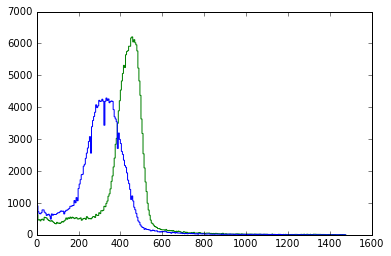

In [131]:
plt.hist((x_data, y_data), bins = 300, range = (1,x_data.max()), histtype ='step', label = 'x_data' )

In [132]:
showSlice(array)

TypeError: <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f3d838f7a80> > is not JSON serializable

In [86]:
showSlice(maskA)

In [88]:
showSlice(maskImageArray)